<a href="https://colab.research.google.com/github/FZenji/CSC3831-2021-22/blob/main/20_12_Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

N.B Please note that I had to run this in multiple stages due to the Google Colab runtimes timing out. I have saved all run attempts on my GitHub page (https://github.com/FZenji/CSC3831-2021-22/blob/main/Image_processing.ipynb) and placed the links in the Appendicies in my report.

N.B 2. I managed to get some more Google Collab runtime, and so some more results are shown here.

# Part 1

First, I will check that all the libraries I plan to use are installed, imported, and working.

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy as np
print('numpy: %s' % np.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.7.3
numpy: 1.21.6
matplotlib: 3.2.2
pandas: 1.3.5
statsmodels: 0.12.2
sklearn: 1.0.2


In [2]:
# # theano
# import theano
# print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow as tf
print('tensorflow: %s' % tf.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

tensorflow: 2.9.2
keras: 2.9.0


In [3]:
# Import the dataset

import tensorflow.keras.datasets as datasets                       
                                                                   
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


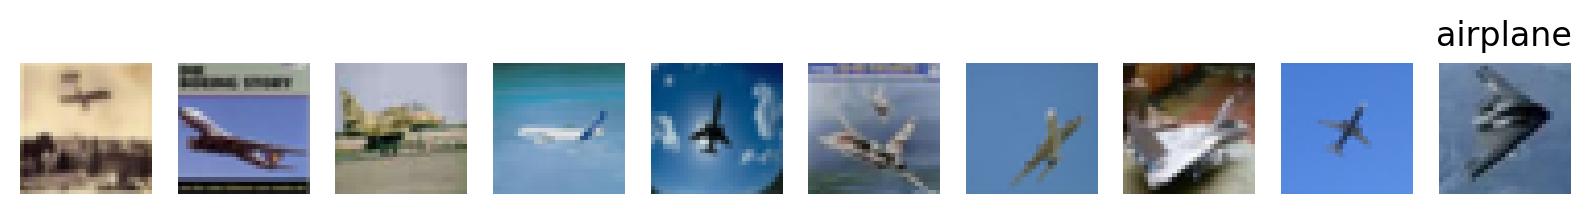

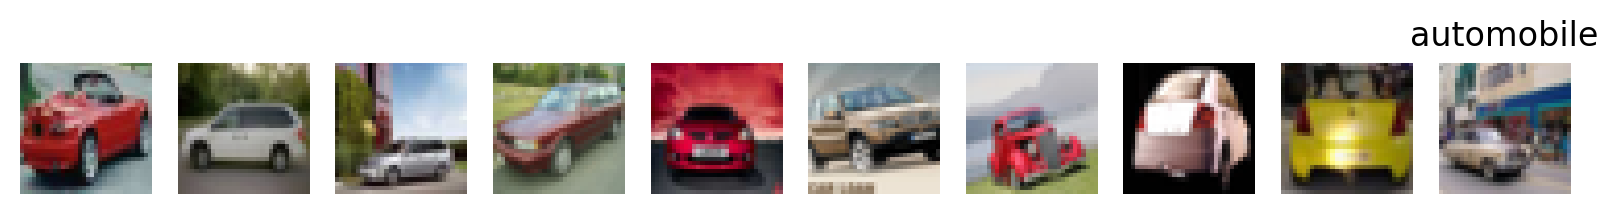

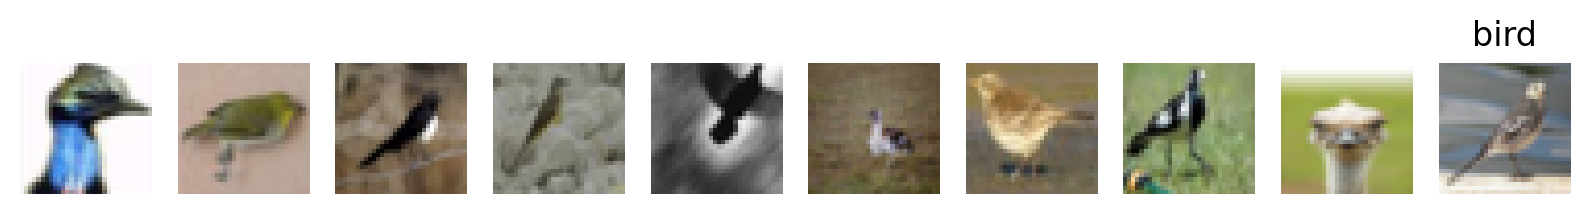

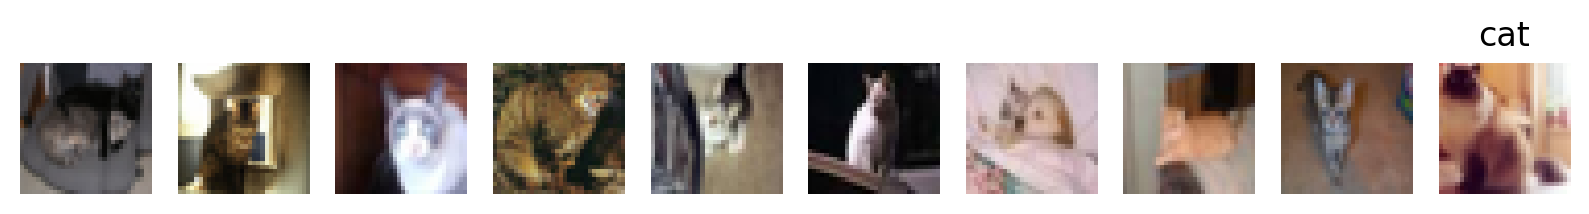

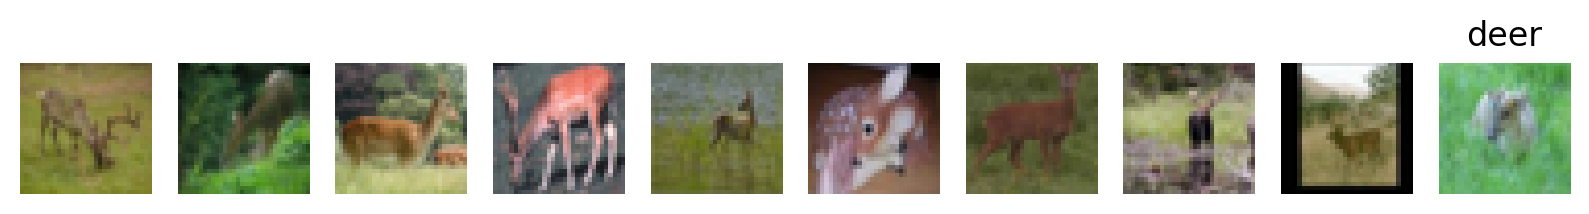

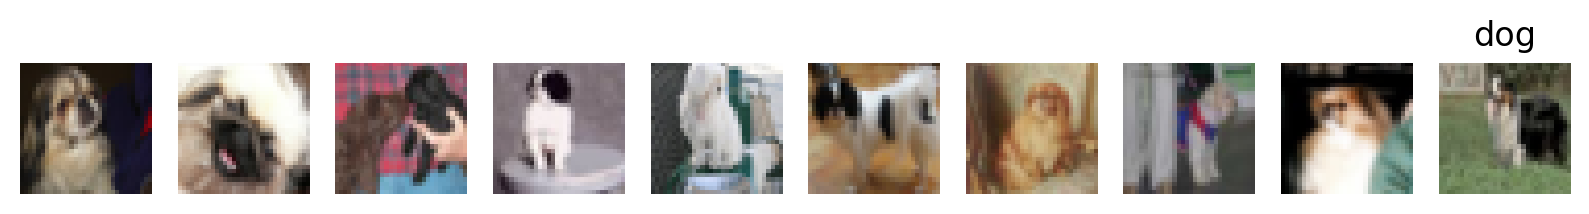

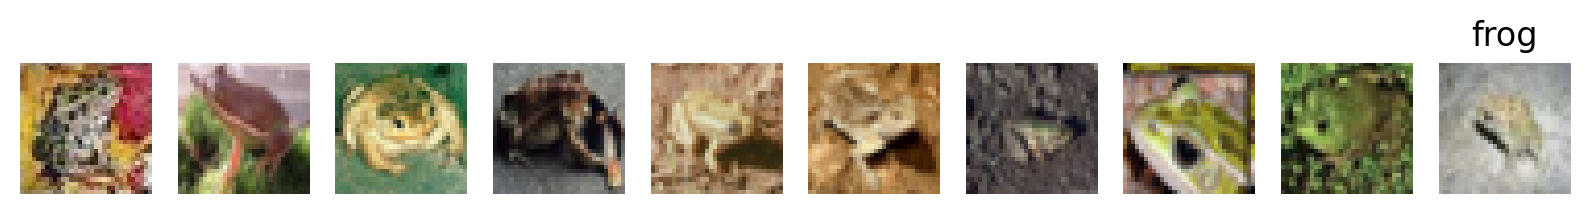

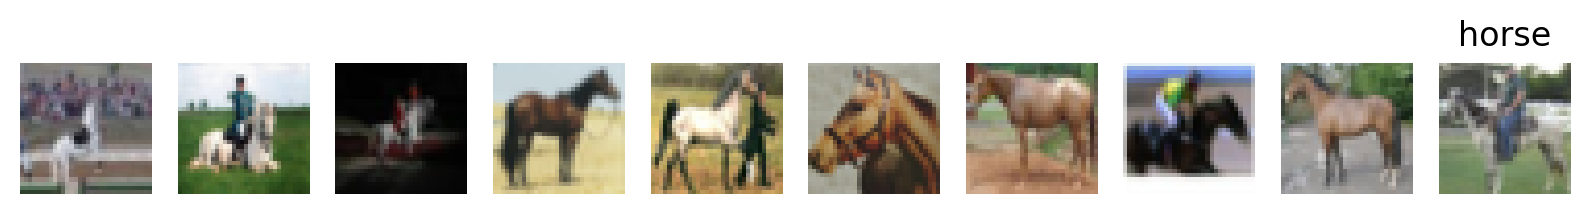

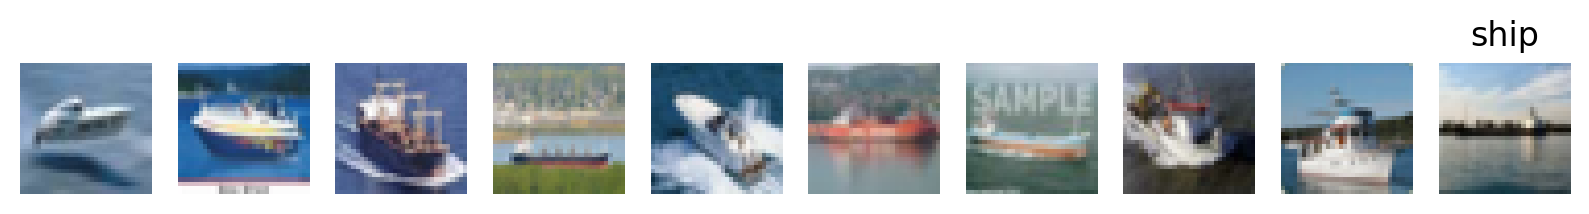

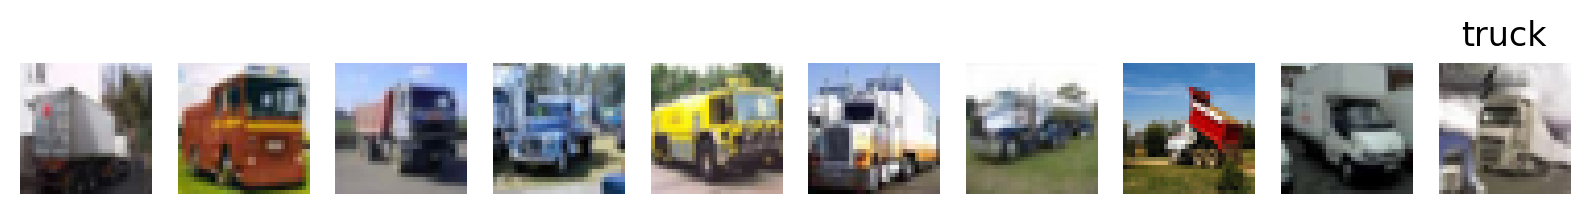

In [4]:
# Some code borrowed from Lab 5 Deep Learning.ipynb [https://ncl.instructure.com/courses/45231/files/6292965?wrap=1]
from matplotlib import pyplot as plt
from matplotlib import rcParams
from random import randint

# adjust figure sizes
plt.rcParams['figure.figsize'] = [10, 1]
plt.rcParams['figure.dpi'] = 200

# summarize loaded dataset
print(f'Train: X={X_train.shape}, y={y_train.shape}')
print(f'Test: X={X_test.shape}, y={y_test.shape}')

# names of the classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# dictionary to separate each class
classes = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}
# separate classes
for i in range(len(X_train)):
    classes[y_train[i][0]].append(X_train[i])

# plot first few images
for class_num in range(10):
    for i in range(10):

        # create a random integer each loop, so that the item at that index can be removed, so there are no duplicates
        random_index = randint(0, len(classes[class_num]))

        # define subplot
        plt.subplot(1, 10, 1 + i)

        # plot raw pixel data
        plt.imshow(classes[class_num][random_index])

        # delete the image from the dictionary to avoid repeats
        del classes[class_num][random_index]
        plt.axis('off')
        
    # show the figure
    plt.title(class_names[class_num])
    plt.show()

Above I am using the random python library to generate a random integer as an index in the respective dictionary class. I show this image and then remove it from the list. This is done so that there are no repeats, even if this is a very low chance. I originally used the random.choice() function which makes the code cleaner, but would allow for these unwanted repeats.

For my CNN, I will take inspiration from the classic LeNet, using average pooling and sigmoid activation.

In [5]:
# Scale the values to a range of 0 to 1

X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Architecture for the LeNet model
basic_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='sigmoid', input_shape=(32, 32, 3)),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid'),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=120, activation='sigmoid'),
    tf.keras.layers.Dense(units=80, activation='sigmoid'),
    tf.keras.layers.Dense(units=10)
])

The basic model has been created, according to the LeNet specifications. Next we will compile the model, fit it and see the results.

In [7]:
# Compile using Adam, to get out of local minima
basic_model.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError(), metrics=['accuracy'])

# Fit the model to the data
basic_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 4ms/step - loss: 2.5317 - accuracy: 0.1014
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5019 - accuracy: 0.1006
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5002 - accuracy: 0.0999
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5010 - accuracy: 0.0996
Epoch 5/10
1563/1563 [==============================] - 5s 4ms/step - loss: 2.4983 - accuracy: 0.1005
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5016 - accuracy: 0.0979
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5023 - accuracy: 0.0990
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.5007 - accuracy: 0.0984
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.4986 - accuracy: 0.0983
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.50

In [8]:
# Test on the test data
test_loss, test_acc = basic_model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 2.5000 - accuracy: 0.1000
Test accuracy: 0.10000000149011612
Test loss: 2.499999523162842


The results here are very, very bad. An accuracy of only 10% means that it did about as well as randomly guessing to which class the images belong. Next I will add a softmax so we can give the model an image and it will tell us to which class it thinks it belongs.

In [9]:
# Get probabilities of each class
prob_model = tf.keras.Sequential([basic_model, tf.keras.layers.Softmax()])

predictions = prob_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [10]:
# Function to produce the image, what it was predicted as, and the probaility distribution of that image
def make_prediction(index, images, labels, predictions):
    plt.figure(figsize=(4, 2))

    plt.subplot(1, 2, 1)
    plt.title(f"Predicted class: {class_names[np.argmax(predictions[index])]}")
    plt.imshow(images[index])
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(range(10), predictions[0])
    plt.xticks(ticks=range(10), labels=class_names, rotation='vertical')
    plt.yticks([])
    plt.show()

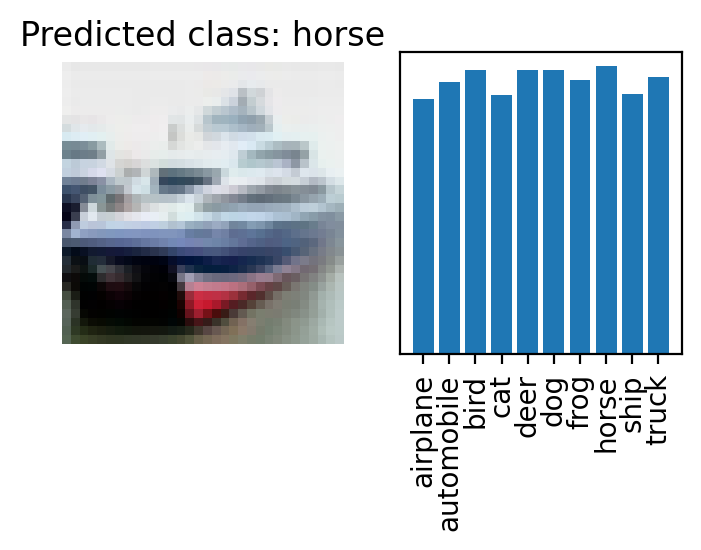

In [11]:
make_prediction(1, X_test, y_test, predictions)

With this function, I can now provide an index and get the image, what it was predicted as, and the probability distribution of the classes.

Next, I will make some improvements to the CNN architecture, by manually changing some values and then using the Keras hyperparameter tuning tool.

# Part 2

In [ ]:
!pip install keras_tuner

In [13]:
import keras_tuner

# Function to build the model so that is can be passed into the hyperparameter tuning
def build_model(hyper):

    # Parameters that will be tuned
    filter1_hyper = hyper.Choice('filter1', values=[32, 64])
    filter2_hyper = hyper.Choice('filter2', values=[96, 128])
    filter3_hyper = hyper.Choice('filter3', values=[192, 256])

    units_hyper = hyper.Choice('units', values=[2048, 4096])

    learning_rate_hyper = hyper.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Upgraded model architecture
    upgrade_model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=filter1_hyper, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
        tf.keras.layers.Conv2D(filters=filter1_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=filter2_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=filter2_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(filters=filter3_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.Conv2D(filters=filter3_hyper, kernel_size=(3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=units_hyper, activation='relu'),
        tf.keras.layers.Dense(units=units_hyper, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax')
    ])

    # Compile and return the new upgraded architecture
    upgrade_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate_hyper), loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

    return upgrade_model

In [14]:
# Using the Hyperband tuner, there are 3 options
tuner = keras_tuner.Hyperband(build_model, objective='val_accuracy', max_epochs=10, factor=4, directory='./CNN_models/', project_name='personal_model')

# If the model performs very badly, it will be skipped
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

# Tune the hyperparameters!
tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stop])

best_hyper = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best hyperparameters:
 - filter1: {best_hyper.get('filter1')}
 - filter2: {best_hyper.get('filter2')}
 - filter3: {best_hyper.get('filter3')}
 - units: {best_hyper.get('units')}
 - learning_rate = {best_hyper.get('learning_rate')}""")

Trial 11 Complete [00h 01m 49s]
val_accuracy: 0.10220000147819519

Best val_accuracy So Far: 0.7797999978065491
Total elapsed time: 00h 17m 38s

Best hyperparameters:
 - filter1: 64
 - filter2: 128
 - filter3: 256
 - units: 2048
 - learning_rate = 0.0001


Now that the hyperparameter tuning is complete, we can see that, mostly as expected, the best hyperparameters are the 'largest' ones. Interestingly, filter3's best value is not 256. This signifies to me that when we have this many filters, the more that are added generate diminishing returns. 256 filters probably performed very similarly to 192.

An accuracy of 78.5% is quite good, although im sure it can be increased to above 95% with a bit more effort. If I were to do this, I would increase the number of times I used the 2 convolution layers and a max pooling. I think if I used 3 convolution layers and then a max pooling I could have gotten better results. Then if I repeated this many more times (e.g. 10-20) then had even denser fully connected layers after the flatten and maybe a few more of these layers.

(N.B. These results were acheieved on the first run of this cell, the above comments pertain to these results)

I will now build the model which got the highest accuracy value from the hyperparameter tuning.

In [15]:
# Train on the data with the best model for 50 epochs, to get the best number of epochs to train
model_hyper = tuner.hypermodel.build(best_hyper)
history = model_hyper.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Get the best epoch
acc_per_epoch = history.history['val_accuracy']
best_epoch = acc_per_epoch.index(max(acc_per_epoch)) + 1
print(f'Best epoch: {best_epoch}')

Epoch 1/50
1250/1250 [==============================] - 16s 12ms/step - loss: 1.5512 - accuracy: 0.4290 - val_loss: 1.2995 - val_accuracy: 0.5414
Epoch 2/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0894 - accuracy: 0.6115 - val_loss: 0.9764 - val_accuracy: 0.6521
Epoch 3/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8512 - accuracy: 0.7024 - val_loss: 0.8738 - val_accuracy: 0.6961
Epoch 4/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6720 - accuracy: 0.7663 - val_loss: 0.7590 - val_accuracy: 0.7329
Epoch 5/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.5115 - accuracy: 0.8224 - val_loss: 0.7464 - val_accuracy: 0.7560
Epoch 6/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3719 - accuracy: 0.8711 - val_loss: 0.7410 - val_accuracy: 0.7587
Epoch 7/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2322 - accuracy: 0.9199 - val_loss: 0.8820 -

Now that we have the best number of epochs to train for, I will train a new model with the same parameters, but for the best number of epochs.

I have to be careful here to make sure that the model has not overfitted.

In [16]:
model_hyper_final = tuner.hypermodel.build(best_hyper)

# Retrain the model
model_hyper_final.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/50
1250/1250 [==============================] - 16s 12ms/step - loss: 1.5170 - accuracy: 0.4416 - val_loss: 1.2093 - val_accuracy: 0.5707
Epoch 2/50
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0524 - accuracy: 0.6274 - val_loss: 0.9164 - val_accuracy: 0.6756
Epoch 3/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8212 - accuracy: 0.7096 - val_loss: 0.8507 - val_accuracy: 0.7098
Epoch 4/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6533 - accuracy: 0.7725 - val_loss: 0.7224 - val_accuracy: 0.7484
Epoch 5/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.5051 - accuracy: 0.8235 - val_loss: 0.7125 - val_accuracy: 0.7642
Epoch 6/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3724 - accuracy: 0.8711 - val_loss: 0.6737 - val_accuracy: 0.7822
Epoch 7/50
1250/1250 [==============================] - 15s 12ms/step - loss: 0.2447 - accuracy: 0.9163 - val_loss: 0.7919 -

In [17]:
eval_result = model_hyper_final.evaluate(X_test, y_test)
print(f'Test accuracy: {eval_result[1]}\nTest loss: {eval_result[0]}')

313/313 [==============================] - 2s 5ms/step - loss: 1.8356 - accuracy: 0.7721
Test accuracy: 0.7720999717712402
Test loss: 1.8356095552444458


I am quite impressed with the results here, an accuracy of 78.1% is impressive in my eyes. As mentioned above, with more convolution layers and pooling layers, I think this could have a very high accuracy rate.

I think the main parameter holding back the results is the number of filters in the first convoultion layer. During the hyperparameter tuning, this is the value that changed the results the most. If this value was low, the results were far worse, regardless of the other parameters.

313/313 [==============================] - 1s 3ms/step


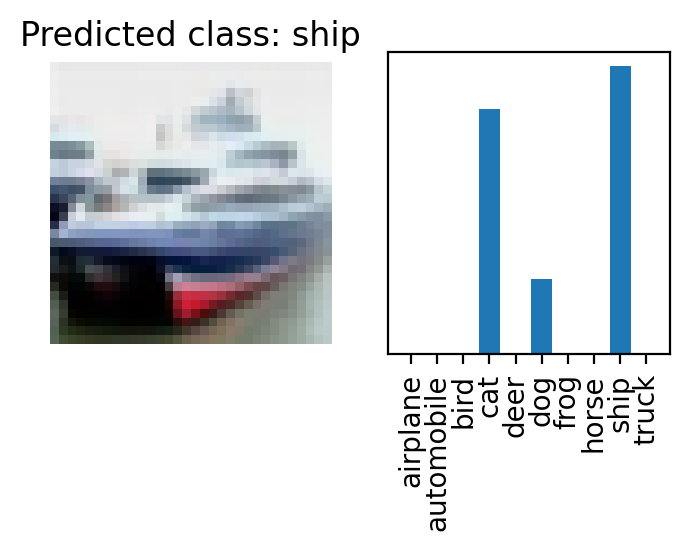

In [18]:
# Create predictions for my model
predictions_hyper = model_hyper_final.predict(X_test)

# Visually see results
make_prediction(1, X_test, y_test, predictions_hyper)

Next, I will use some in-built CNN architectures and compare the model performance against my own.

# Part 3

The in-built models I will use, are ResNet and Xception. I will use the hyper versions of these, which are just versions which will do the hyperparameter tuning as well.

In [19]:
resnet_hyper = keras_tuner.applications.HyperResNet(input_shape=(32, 32, 3), classes=10)

# This time I will use the BayesiasnOptimization tuner
tuner = keras_tuner.BayesianOptimization(resnet_hyper, objective='val_accuracy', max_trials=3, directory='./CNN_models/', project_name='HyperResNet')

# If the model performs very badly, it will be skipped
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)

# One-hot-encode the labels
y_train_res = keras.utils.to_categorical(y_train)
y_test_res = keras.utils.to_categorical(y_test)

# Tune the hyperparameters!
tuner.search(X_train, y_train_res, epochs=20, validation_split=0.2, callbacks=[early_stop])

best_hyper = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 3 Complete [00h 28m 44s]
val_accuracy: 0.4593999981880188

Best val_accuracy So Far: 0.6061000227928162
Total elapsed time: 01h 21m 15s


These results surprised me. I was expecting much better performance from the in-built architectures, especially a hypermodel version. This model also took substanitally more time to train than my own personal model but nonetheless has much lower performance.

In [20]:
# Train on the data with the best model for 30 epochs, to get the best number of epochs to train
model_hyper = tuner.hypermodel.build(best_hyper)
history = model_hyper.fit(X_train, y_train_res, epochs=30, validation_split=0.2)

# Get the best epoch
acc_per_epoch = history.history['val_accuracy']
best_epoch = acc_per_epoch.index(max(acc_per_epoch)) + 1
print(f'Best epoch: {best_epoch}')

Epoch 1/30
1250/1250 [==============================] - 177s 120ms/step - loss: 2.3611 - accuracy: 0.2267 - val_loss: 2.0761 - val_accuracy: 0.2569
Epoch 2/30
1250/1250 [==============================] - 146s 117ms/step - loss: 2.2233 - accuracy: 0.3028 - val_loss: 5.9003 - val_accuracy: 0.1219
Epoch 3/30
1250/1250 [==============================] - 144s 115ms/step - loss: 1.9568 - accuracy: 0.3724 - val_loss: 2.1719 - val_accuracy: 0.3199
Epoch 4/30
1250/1250 [==============================] - 145s 116ms/step - loss: 1.7314 - accuracy: 0.4439 - val_loss: 7.8310 - val_accuracy: 0.3225
Epoch 5/30
1250/1250 [==============================] - 143s 115ms/step - loss: 1.5540 - accuracy: 0.4897 - val_loss: 1.6242 - val_accuracy: 0.4676
Epoch 6/30
1250/1250 [==============================] - 144s 115ms/step - loss: 1.4316 - accuracy: 0.5256 - val_loss: 1.6266 - val_accuracy: 0.4690
Epoch 7/30
1250/1250 [==============================] - 144s 116ms/step - loss: 1.3040 - accuracy: 0.5670 - val_

Unfortunately, it was at this time that I ran out of Google Colab runtime on the GPUs. This means that training the one remaining model, the hyper Xception model, will not really be feasable. Instead I will just run the Xception model with my own hyperparameters for one model.

In [1]:
model_hyper_resnet = tuner.hypermodel.build(best_hyper)

# Retrain the model
model_hyper_resnet.fit(X_train, y_train_res, epochs=best_epoch, validation_split=0.2)

NameError: ignored

In [ ]:
eval_result = model_hyper_resnet.evaluate(X_test, y_test_res)
print(f'Test accuracy: {eval_result[1]}\nTest loss: {eval_result[0]}')

In [ ]:
# Create predictions for the ResNet hypermodel
predictions_hyper_resnet = model_hyper_resnet.predict(X_test)

# Visually see results
make_prediction(1, X_test, y_test, predictions_hyper_resnet)

I will create the normal Xception model below. Interestingly, there is an option to train with weights pre-trained on imagenet, I will use this option as I am curious of the results.

The minium input size for the Xception model is (71, 71, 3), so unfortunately this is not an option. Instead I will use EfficientNetB0, this also has the imagenet pre-trained values. I ran this on my own computer as the epochs were taking 2-3 mins instead of 10.

I realised that the model being pre-trained on imagenet, meant that the output was to 1280 different classes insead of 10, so I changed it to have random weight initialisation.

In [ ]:
effnet_model = tf.keras.applications.EfficientNetB0(weights=None, input_shape=(32, 32, 3), pooling='max', classes=10, classifier_activation="softmax",)

# Compile using Adam, to get out of local minima
effnet_model.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError(), metrics=['accuracy'])

# Fit the model to the data
effnet_model.fit(X_train, y_train, epochs=10)

In [ ]:
# Test on the test data
test_loss, test_acc = effnet_model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

In [ ]:
# Create predictions for the EfficientNetB0 model
effnet_predictions = effnet_model.predict(X_test)

# Visually see results
make_prediction(1, X_test, y_test, effnet_predictions)

I ran the above code on my personal computer and so the results are unfortunately not shown here, although they are included in the report.

# Reflective Conclusion

I found this module extremely enjoyable. The statisfaction of when a model performs well is so fufilling. I really enjoy working with the machine learning tools, and hope to continue using them in the future to great effect.
